# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [2]:
# Read your api key environment variable
from newsapi import NewsApiClient
load_dotenv()
api_key = os.getenv("news_api")

type(api_key)

str

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(q="bitcoin",
                                         language="en",
                                         sort_by="relevancy",
                                         page=2)
#Print total articles
print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")
# Show sample article
bitcoin_headlines["articles"][0]

Total articles about Bitcoin: 3941


{'source': {'id': 'reuters', 'name': 'Reuters'},
 'author': 'Anna Irrera',
 'title': 'Bitcoin hits highest level since January 2018 amid post-election volatility - Reuters UK',
 'description': "Bitcoin's price rose to more than $14,900 on Thursday, its highest level since January 2018, amid volatility caused by the U.S. election and investor hopes that more central bank stimulus to support economies hit by the COVID-19 pandemic will push up the valu…",
 'url': 'https://www.reuters.com/article/us-crypto-currencies-bitcoin-idUKKBN27L234',
 'urlToImage': 'https://static.reuters.com/resources/r/?m=02&d=20201105&t=2&i=1540130858&r=LYNXMPEGA4185&w=800',
 'publishedAt': '2020-11-05T15:22:00Z',
 'content': 'LONDON (Reuters) - Bitcoins price rose to more than $14,900 on Thursday, its highest level since January 2018, amid volatility caused by the U.S. election and investor hopes that more central bank st… [+2469 chars]'}

In [5]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(q="ethereum",
                                          language="en",
                                          sort_by="relevancy",
                                          page=2)
# Print total articles
print(f"Total articles about Etherum: {ethereum_headlines['totalResults']}")
# Show sample article
ethereum_headlines["articles"][0]

Total articles about Etherum: 1152


{'source': {'id': None, 'name': 'Marginalrevolution.com'},
 'author': 'Tyler Cowen',
 'title': 'What should I answer Vitalik Buterin?',
 'description': 'Not a CWT, as he will be interviewing me, but likely a discussion too, who knows what I may fling back at him? What do you all recommend I read to prepare?\xa0 I prepared a great deal for my CWT with Vitalik a few years ago (one of my favorite episodes), but wha…',
 'url': 'https://marginalrevolution.com/marginalrevolution/2020/10/what-should-i-answer-vitalik-buterin.html',
 'urlToImage': 'https://marginalrevolution.com/wp-content/uploads/2016/10/MR-logo-thumbnail.png',
 'publishedAt': '2020-10-13T14:30:37Z',
 'content': 'Not a CWT, as he will be interviewing me, but likely a discussion too, who knows what I may fling back at him?\r\nWhat do you all recommend I read to prepare?\xa0 I prepared a great deal for my CWT with V… [+195 chars]'}

In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]
bitcoin_df.head()


,date,text,compound,positive,negative,neutral
0,2020-11-05,LONDON (Reuters) - Bitcoins price rose to more...,0.4215,0.078,0.000,0.922
1,2020-10-12,By Reuters Staff\r\nLONDON (Reuters) - Bank of...,0.2500,0.060,0.035,0.905
2,2020-10-21,"The end is in sight for Quibi, PayPal adds cry...",0.4019,0.074,0.000,0.926
3,2020-10-12,By Reuters Staff\r\nLONDON (Reuters) - Bank of...,0.2500,0.060,0.035,0.905
4,2020-11-05,Earlier this week someone moved nearly a billi...,-0.0920,0.053,0.062,0.885


In [7]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]
ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2020-10-13,"Not a CWT, as he will be interviewing me, but ...",0.9120,0.249,0.0,0.751
1,2020-10-14,Ethereum’s popularity has congested the networ...,0.8548,0.278,0.0,0.722
2,2020-10-21,"PayPal, a leading digital payment provider, to...",0.5574,0.141,0.0,0.859
3,2020-11-07,"November\r\n7, 2020\r\n5 min read\r\nOpinions ...",0.3612,0.088,0.0,0.912
4,2020-10-28,"October\r\n28, 2020\r\n4 min read\r\nOpinions ...",0.0000,0.000,0.0,1.000


In [8]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.226835,0.081250,0.028650,0.890150
std,0.422783,0.076101,0.043974,0.079596
min,-0.599400,0.000000,0.000000,0.703000
25%,0.000000,0.000000,0.000000,0.874000
50%,0.325950,0.076000,0.000000,0.890500
75%,0.510600,0.125000,0.040500,0.923000
max,0.946800,0.297000,0.132000,1.000000


In [9]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,19.000000,19.000000,19.000000,19.000000
mean,0.275316,0.075105,0.006368,0.918526
std,0.317288,0.080871,0.019094,0.080106
min,-0.318200,0.000000,0.000000,0.722000
25%,0.000000,0.000000,0.000000,0.886500
50%,0.226300,0.063000,0.000000,0.937000
75%,0.411700,0.084500,0.000000,0.977000
max,0.912000,0.278000,0.063000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum has the highest mean positive score.

Q: Which coin had the highest compound score?

A: Ethereum has the highest compound score.

Q. Which coin had the highest positive score?

A: Ethereum has the highest positive score. 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Expand the default stopwords list if necessary
wnl = WordNetLemmatizer() 
stop = stopwords.words('english')
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append('char')
stop.append("''")
stop = set(stop)

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    # Remove the stop words
    words = list(filter(lambda t: t.lower() not in stop, words))
    # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    return tokens

In [13]:
# Create a new tokens column for bitcoin
bitcoin_df["tokens"] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-11-05,LONDON (Reuters) - Bitcoins price rose to more...,0.4215,0.078,0.000,0.922,"[LONDON, Reuters, Bitcoins, price, rose, 14,90..."
1,2020-10-12,By Reuters Staff\r\nLONDON (Reuters) - Bank of...,0.2500,0.060,0.035,0.905,"[Reuters, Staff, LONDON, Reuters, Bank, Englan..."
2,2020-10-21,"The end is in sight for Quibi, PayPal adds cry...",0.4019,0.074,0.000,0.926,"[end, sight, Quibi, PayPal, add, cryptocurrenc..."
3,2020-10-12,By Reuters Staff\r\nLONDON (Reuters) - Bank of...,0.2500,0.060,0.035,0.905,"[Reuters, Staff, LONDON, Reuters, Bank, Englan..."
4,2020-11-05,Earlier this week someone moved nearly a billi...,-0.0920,0.053,0.062,0.885,"[Earlier, week, someone, moved, nearly, billio..."


In [14]:
# Create a new tokens column for eth
ethereum_df["tokens"] = ethereum_df.text.apply(tokenizer)
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-10-13,"Not a CWT, as he will be interviewing me, but ...",0.9120,0.249,0.0,0.751,"[CWT, interviewing, likely, discussion, know, ..."
1,2020-10-14,Ethereum’s popularity has congested the networ...,0.8548,0.278,0.0,0.722,"[Ethereum, ’, popularity, congested, network, ..."
2,2020-10-21,"PayPal, a leading digital payment provider, to...",0.5574,0.141,0.0,0.859,"[PayPal, leading, digital, payment, provider, ..."
3,2020-11-07,"November\r\n7, 2020\r\n5 min read\r\nOpinions ...",0.3612,0.088,0.0,0.912,"[November, 7, 2020, 5, min, read, Opinions, ex..."
4,2020-10-28,"October\r\n28, 2020\r\n4 min read\r\nOpinions ...",0.0000,0.000,0.0,1.000,"[October, 28, 2020, 4, min, read, Opinions, ex..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
N = 2
grams = ngrams(tokenizer(bitcoin_df.text.str.cat()), N)
Counter(grams).most_common(20)

[(('LONDON', 'Reuters'), 9),
 (('char', 'LONDON'), 6),
 (('Reuters', 'PayPal'), 6),
 (('PayPal', 'Holdings'), 6),
 (('virtual', 'coin'), 6),
 (('Holdings', 'Inc'), 5),
 (('joined', 'cryptocurrency'), 4),
 (('cryptocurrency', 'market'), 4),
 (('market', 'Wednesday'), 4),
 (('Wednesday', 'allowing'), 4),
 (('allowing', 'customer'), 4),
 (('customer', 'buy'), 4),
 (('buy', 'sell'), 4),
 (('sell', 'hold'), 4),
 (('hold', 'bitcoin'), 4),
 (('bitcoin', 'virtual'), 4),
 (('coin', 'using'), 4),
 (('using', 'U.S.'), 4),
 (('U.S.', 'digital'), 4),
 (('digital', 'payment'), 4)]

In [17]:
# Generate the Ethereum N-grams where N=2
N = 2
grams = ngrams(tokenizer(ethereum_df.text.str.cat()), N)
Counter(grams).most_common(20)

[(('smart', 'contract'), 3),
 (('char', 'PayPal'), 2),
 (('digital', 'payment'), 2),
 (('allow', 'customer'), 2),
 (('customer', 'buy'), 2),
 (('min', 'read'), 2),
 (('read', 'Opinions'), 2),
 (('Opinions', 'expressed'), 2),
 (('expressed', 'Entrepreneur'), 2),
 (('Entrepreneur', 'contributor'), 2),
 (('char', 'price'), 2),
 (('Bitcoin', 'BTC'), 2),
 (('Ethereum', 'ETH'), 2),
 (('write', 'simple'), 2),
 (('simple', 'smart'), 2),
 (('first', 'time'), 2),
 (('CWT', 'interviewing'), 1),
 (('interviewing', 'likely'), 1),
 (('likely', 'discussion'), 1),
 (('discussion', 'know'), 1)]

In [18]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Get the top 10 words for Bitcoin
all_tokens = tokenizer(bitcoin_df.text.str.cat())
token_count(all_tokens, 10)

[('char', 20),
 ('Reuters', 13),
 ('LONDON', 9),
 ('bitcoin', 8),
 ('PayPal', 7),
 ('U.S.', 6),
 ('Wednesday', 6),
 ('Holdings', 6),
 ('virtual', 6),
 ('coin', 6)]

In [20]:
# Get the top 10 words for Ethereum
all_tokens = tokenizer(ethereum_df.text.str.cat())
token_count(all_tokens, 10)

[('char', 19),
 ('Ethereum', 11),
 ('cryptocurrency', 7),
 ('Bitcoin', 6),
 ('contract', 5),
 ('price', 5),
 ('ETH', 5),
 ('PayPal', 4),
 ('payment', 4),
 ('4', 4)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [22]:
# Generate the Bitcoin word cloud
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()

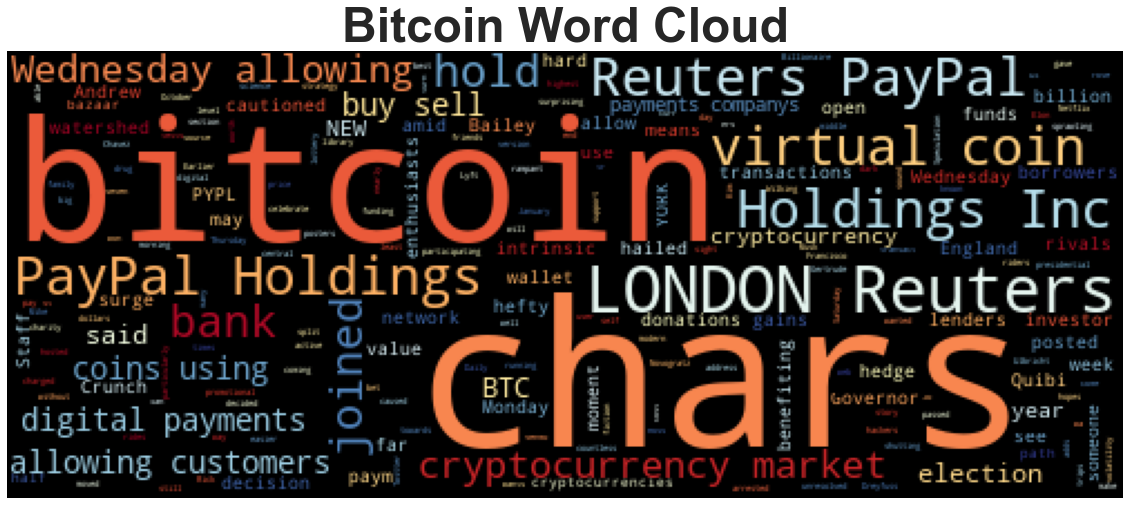

In [23]:
wordcloud(bitcoin_df.text.str.cat(), title="Bitcoin Word Cloud")

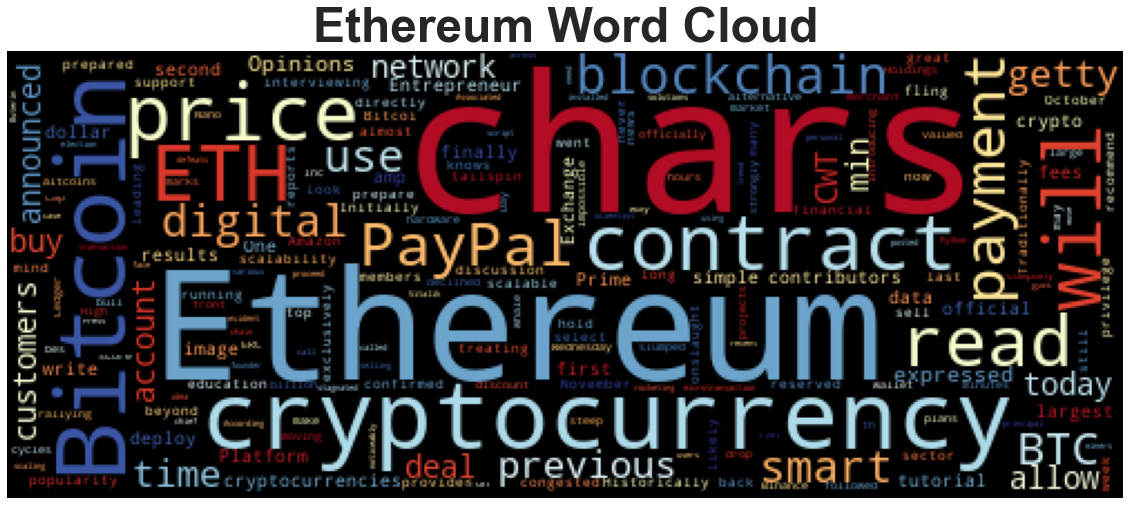

In [24]:
# Generate the Ethereum word cloud
wordcloud(ethereum_df.text.str.cat(), title="Ethereum Word Cloud")

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [25]:
import spacy
from spacy import displacy

In [26]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [27]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [28]:
# Concatenate all of the bitcoin text together
all_bitcoin_df_text = bitcoin_df.text.str.cat()
all_bitcoin_df_text

'LONDON (Reuters) - Bitcoins price rose to more than $14,900 on Thursday, its highest level since January 2018, amid volatility caused by the U.S. election and investor hopes that more central bank st… [+2469 chars]By Reuters Staff\r\nLONDON (Reuters) - Bank of England Governor Andrew Bailey said on Monday it was hard to see how Bitcoin BTC= had any intrinsic value and he cautioned over its use as a means of paym… [+420 chars]The end is in sight for Quibi, PayPal adds cryptocurrency support and Netflix tests a new promotional strategy. This is your Daily Crunch for October 21, 2020.\r\nThe big story: Quibi is shutting down\r… [+3035 chars]By Reuters Staff\r\nLONDON (Reuters) - Bank of England Governor Andrew Bailey said on Monday it was hard to see how Bitcoin BTC= had any intrinsic value and he cautioned over its use as a means of paym… [+420 chars]Earlier this week someone moved nearly a billion dollars worth of bitcoin (69,369 BTC\xa0) from a wallet address that hadn\'t been active 

In [29]:
# Run the NER processor on all of the text
doc = nlp(all_bitcoin_df_text)
# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [30]:
# Render the visualization
displacy.render(doc, style='ent', jupyter=True)

In [32]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

LONDON GPE
Reuters ORG
more than $14,900 MONEY
Thursday DATE
January 2018 DATE
U.S. GPE
Reuters ORG
LONDON GPE
Reuters ORG
Bank of England ORG
Andrew Bailey PERSON
Monday DATE
Bitcoin GPE
Quibi ORG
PayPal PRODUCT
Netflix PERSON
Daily Crunch WORK_OF_ART
October 21, 2020 DATE
Reuters ORG
LONDON GPE
Reuters ORG
Bank of England ORG
Andrew Bailey PERSON
Monday DATE
Bitcoin GPE
this week DATE
nearly a billion dollars MONEY
69,369 CARDINAL
BTC ORG
2015 DATE
Kim Jo PERSON
the coming weeks DATE
US GPE
Venmo GPE
2020 DATE
U.S. GPE
Wednesday DATE
morning TIME
Elon Musk WORK_OF_ART
modern-day DATE
Reuters ORG
PayPal Holdings Inc ORG
Wednesday DATE
U.S. GPE
Reuters ORG
PayPal Holdings Inc ORG
Wednesday DATE
U.S. GPE
Reuters ORG
PayPal Holdings Inc ORG
Wednesday DATE
U.S. GPE
YORK PERSON
Reuters ORG
this year DATE
Chavez-Dreyfuss PERSON
Reuters ORG
this year DATE
Reuters ORG
PayPal Holdings Inc's ORG
bitcoin GPE
Reuters ORG
Reuters ORG
PayPal Holdings Inc ORG
Wednesday DATE
U.S. GPE
Rick Wilking PER

---

## Ethereum NER

In [33]:
# Concatenate all of the Ethereum text together
all_ethereum_df_text = ethereum_df.text.str.cat()
all_ethereum_df_text

"Not a CWT, as he will be interviewing me, but likely a discussion too, who knows what I may fling back at him?\r\nWhat do you all recommend I read to prepare?\xa0 I prepared a great deal for my CWT with V… [+195 chars]Ethereum’s popularity has congested the network like never before, and scalability is top of mind. Historically, and still today, many look beyond Ethereum for more scalable smart contract platforms.… [+7723 chars]PayPal, a leading digital payment provider, today announced that it will allow customers to buy, hold and sell cryptocurrency directly from their PayPal account. Initially, PayPal will support Bitcoi… [+1804 chars]November\r\n7, 2020\r\n5 min read\r\nOpinions expressed by Entrepreneur contributors are their own.\r\nTraditionally, financial education was\xa0a privilege, reserved almost exclusively for a select few. Those … [+5844 chars]October\r\n28, 2020\r\n4 min read\r\nOpinions expressed by Entrepreneur contributors are their own.\r\nThe cryptocurrency sector

In [34]:
# Run the NER processor on all of the text
doc = nlp(all_ethereum_df_text)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [35]:
# Render the visualization
displacy.render(doc, style='ent', jupyter=True)

In [36]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

CWT ORG
CWT ORG
today DATE
today DATE
PayPal PRODUCT
PayPal PRODUCT
Bitcoi PRODUCT
5 min QUANTITY
28, 2020 DATE
4 min QUANTITY
last week DATE
Prime Day DATE
One CARDINAL
the Ledger Nano S WORK_OF_ART
39.99 MONEY
chars]PayPal Holdings Inc. ORG
Wednesday DATE
Bitcoin GPE
BTC ORG
Ethereum ( ORG
ETH ORG
ETH ORG
BTC ORG
Ethereum (ETH ORG
second ORDINAL
$43 billion MONEY
4% PERCENT
4 hours TIME
4,000 CARDINAL
one CARDINAL
Python ORG
Ethereums PERSON
Vitalik Buterin PERSON
second ORDINAL
ETH ORG
Bitcoin GPE
U.S. GPE
the Associated Press ORG
two CARDINAL
AFP ORG
first ORDINAL
jigsaw puzzle PERSON
3D CARDINAL
Modern Digital Technologies ORG
Bitcoin GPE
Bitcoin GPE
Solidity ORG
the Ethereum Blockchain ORG
A Social Platform for Cryptocurrency Investors &amp ORG
Traders &amp ORG
Bitcoin GPE
12,000 MONEY
first ORDINAL
September DATE
ul><li PERSON
Bitcoin GPE
BTC ORG
around $11,910 MONEY
20:00 TIME
4 p.m. ET TIME
1.8% PERCENT
the previous 24 DATE
